In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_tsp_file(file_path):
    coordinates = []
    
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            
            if not line or line.startswith(("NAME", "TYPE", "COMMENT", "DIMENSION", "EDGE_WEIGHT_TYPE")):
                continue
            
            if line == "NODE_COORD_SECTION":
                continue
            
            if line == "EOF":
                break
            
            parts = line.split()
            if len(parts) == 3:
                node, x, y = parts
                coordinates.append((int(node), float(x), float(y)))
    
    df = pd.DataFrame(coordinates, columns=['node', 'X', 'Y']).set_index('node')
    return df

def read_best_file(file_path):
    coordinates = []
    with open(file_path, 'r') as file:
        skip = True
        for line in file:
            if skip == True and line.startswith("TOUR_SECTION"):
                skip = False
                continue
            if skip:
                continue
            if line.startswith("-1"):
                break
            coordinates.append(int(line))
    return coordinates


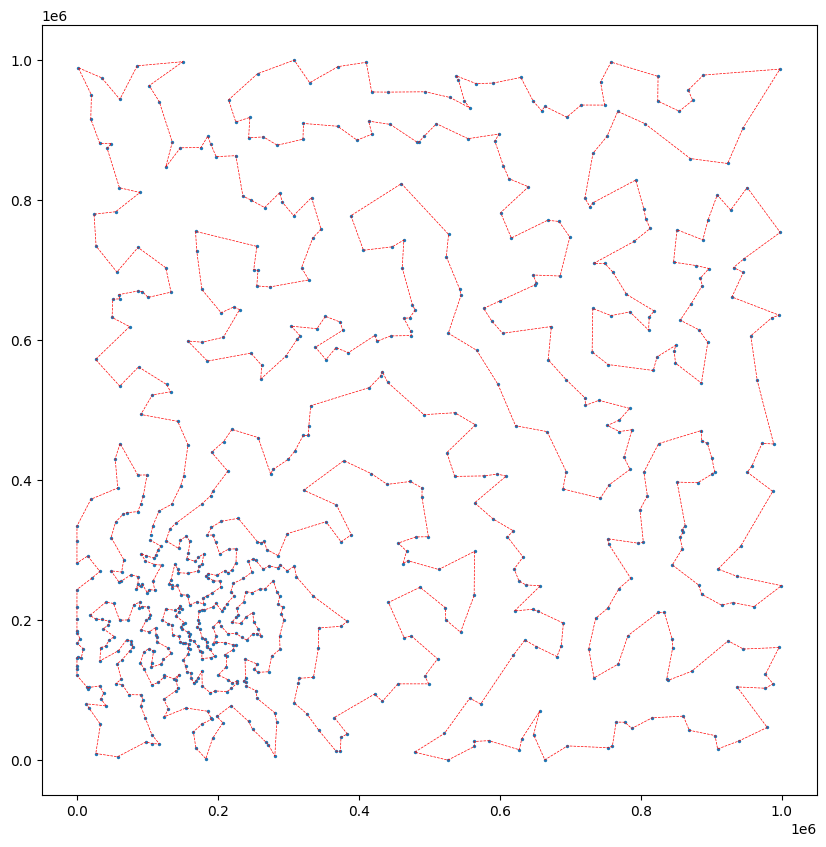

In [3]:
# file_path = 'LKH-2.0.10\pr2392.tsp'
file_path = 'CEPS/instance_set/mutator_TSP/cluster/0.tsp'
solution_path = 'best'
df = read_tsp_file(file_path)
solution = read_best_file(solution_path)

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df['X'], df['Y'], s=2);
plt.plot(df.loc[solution, 'X'], df.loc[solution, 'Y'], linestyle='--', color="red", lw=0.5, )
plt.show()